In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data=pd.read_csv('Training.csv')

In [3]:
data=data.dropna(axis=1)

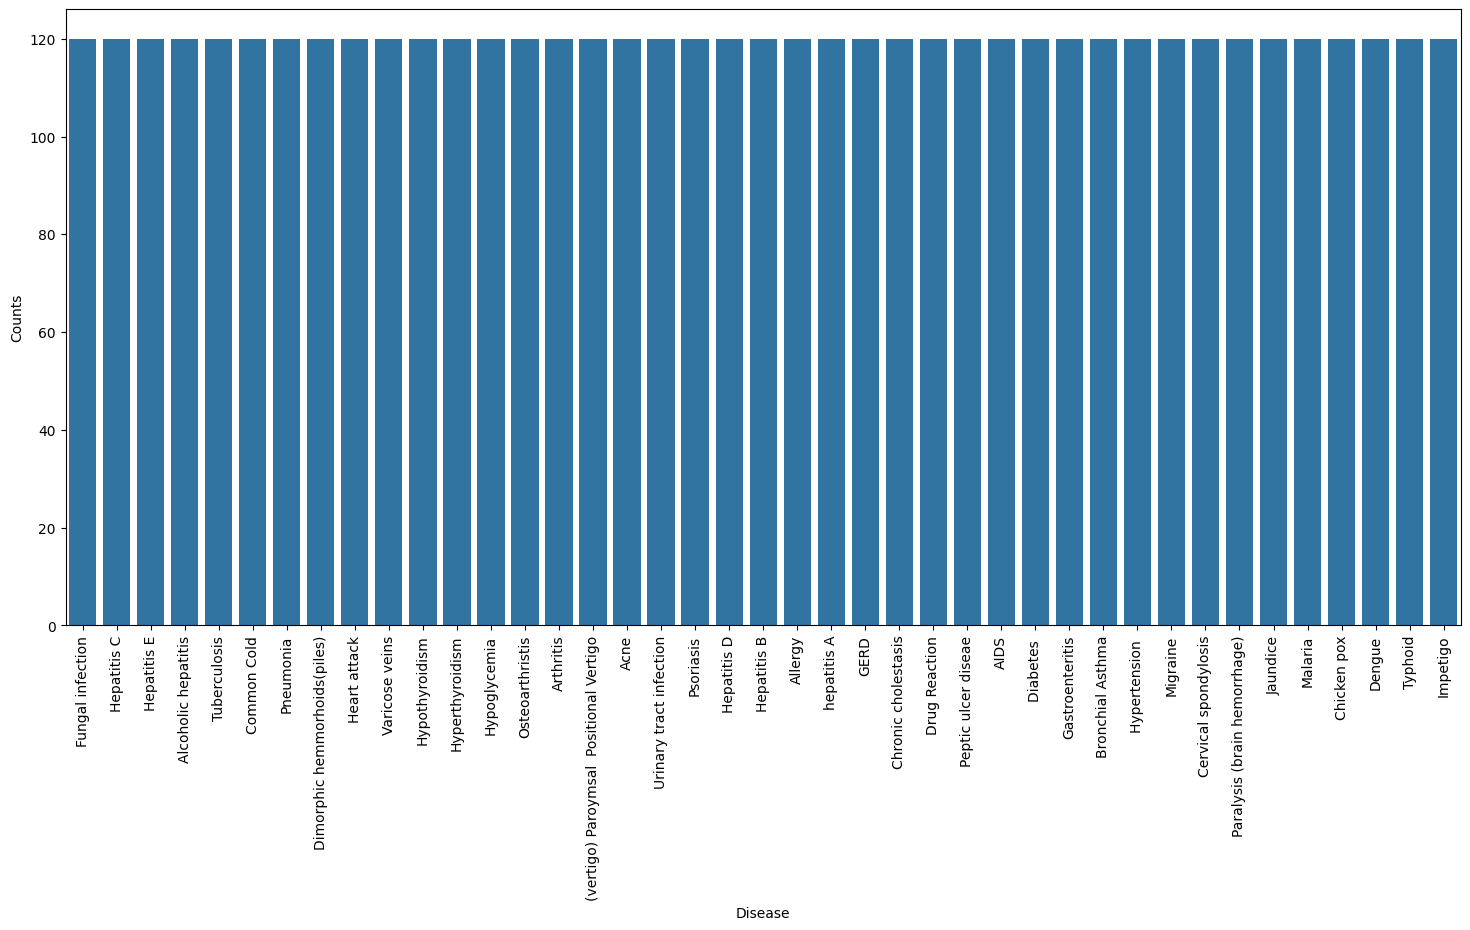

In [4]:
disease_counts=data["prognosis"].value_counts()
temp_df=pd.DataFrame({
    "Disease":disease_counts.index,
    "Counts":disease_counts.values
})
plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
encoder=LabelEncoder()
data["prognosis"]=encoder.fit_transform(data["prognosis"])

In [6]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [7]:
print(f"Train: {X_train.shape}, {y_train.shape}") 
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [8]:
def cv_scoring(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))

In [9]:
models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)}

In [10]:
for model_name in models:
    model=models[model_name]
    scores=cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring=cv_scoring)

In [11]:
print("=="*30) 
print(model_name) 
print(f"Scores: {scores}") 
print(f"Mean Score: {np.mean(scores)}")

Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [12]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
predictions=svm_model.predict(X_test)

In [13]:
accuracy_score(y_train, svm_model.predict(X_train))*100

100.0

In [14]:
accuracy_score(y_test, predictions)*100

100.0

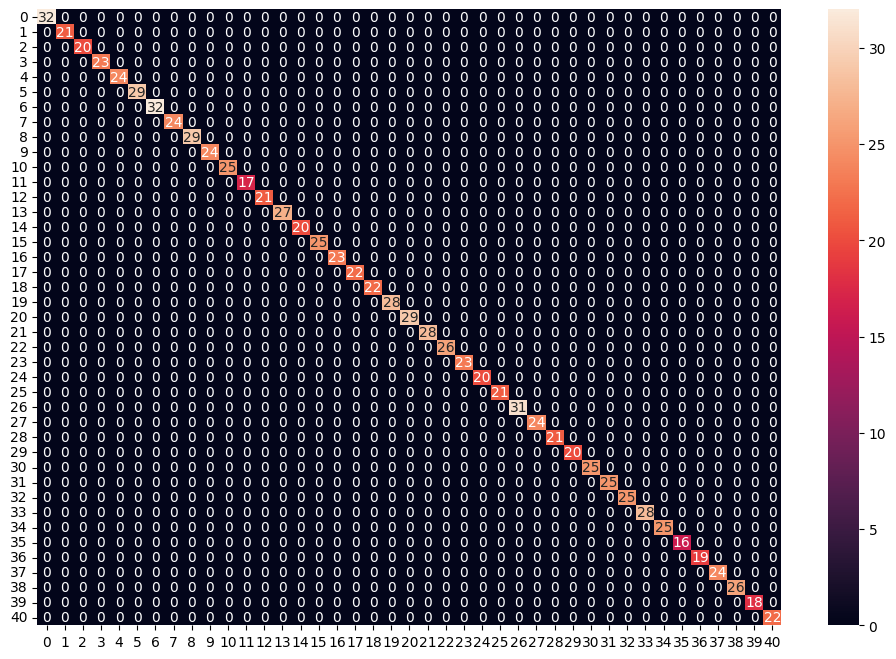

In [15]:
cf_matrix=confusion_matrix(y_test,predictions)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.show()

In [16]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
predictions=nb_model.predict(X_test)

In [17]:
accuracy_score(y_train, nb_model.predict(X_train))*100

100.0

In [18]:
accuracy_score(y_test, predictions)*100

100.0

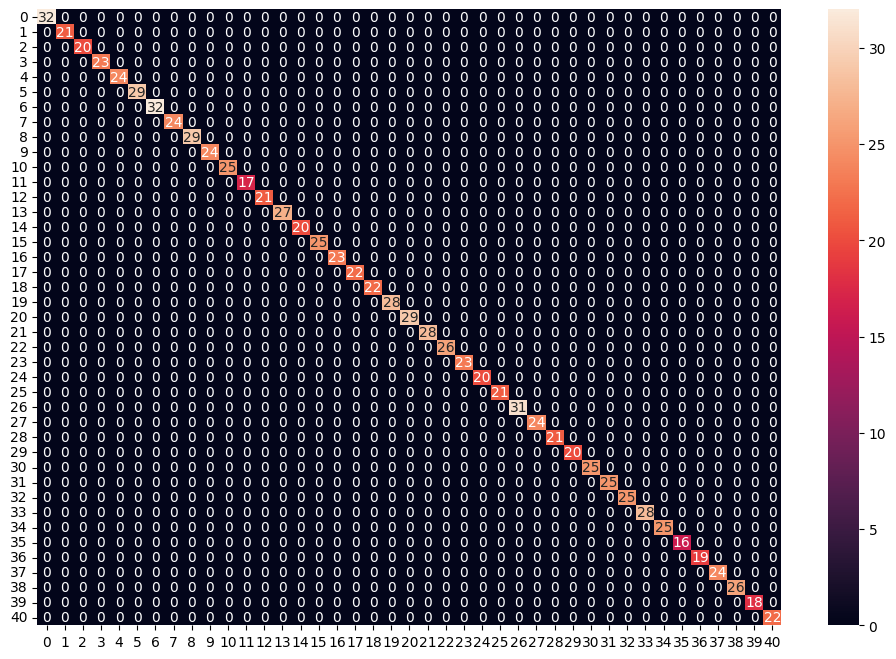

In [19]:
cf_matrix = confusion_matrix(y_test, predictions) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.show()

In [20]:
rf_model=RandomForestClassifier(random_state=18)
rf_model.fit(X_train,y_train)
predictions=rf_model.predict(X_test)

In [21]:
{accuracy_score(y_train, rf_model.predict(X_train))*100}

{100.0}

In [22]:
accuracy_score(y_test, predictions)*100

100.0

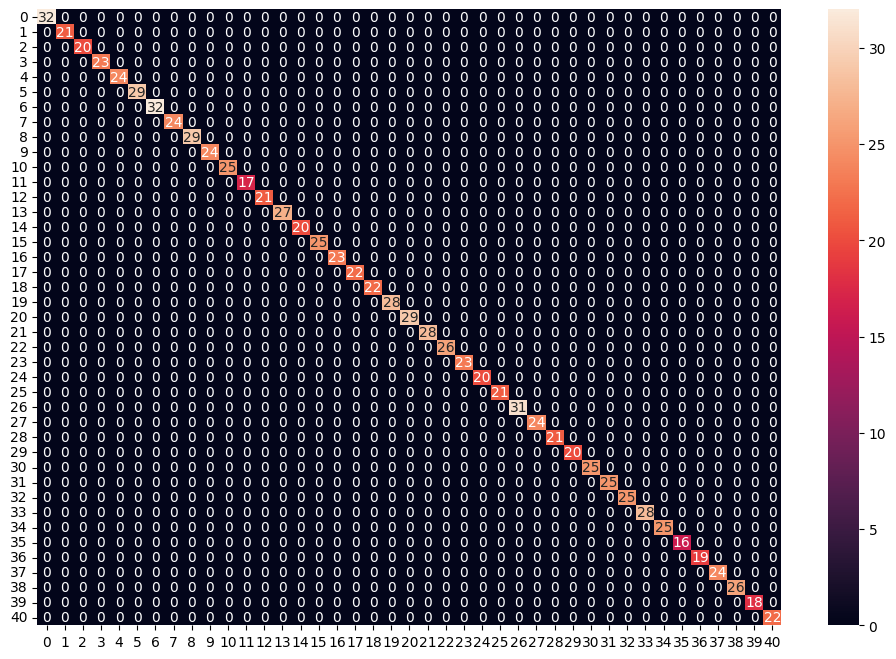

In [23]:
cf_matrix = confusion_matrix(y_test, predictions) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.show()

In [24]:
final_svm_model = SVC() 
final_nb_model = GaussianNB() 
final_rf_model = RandomForestClassifier(random_state=18) 
final_svm_model.fit(X, y) 
final_nb_model.fit(X, y) 
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [25]:
test_data = pd.read_csv('Testing.csv').dropna(axis=1) 

In [26]:
test_X = test_data.iloc[:, :-1] 
test_Y = encoder.transform(test_data.iloc[:, -1]) 

In [29]:

# Define Features and Labels for Training
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Training Models
final_svm_model = SVC() 
final_nb_model = GaussianNB() 
final_rf_model = RandomForestClassifier(random_state=18) 

final_svm_model.fit(X, y) 
final_nb_model.fit(X, y) 
final_rf_model.fit(X, y)

# Predictions and Evaluations
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Accuracy Scores
print("SVM Accuracy:", accuracy_score(test_Y, svm_preds))
print("Naive Bayes Accuracy:", accuracy_score(test_Y, nb_preds))
print("Random Forest Accuracy:", accuracy_score(test_Y, rf_preds))

# Confusion Matrices
print("SVM Confusion Matrix:\n", confusion_matrix(test_Y, svm_preds))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(test_Y, nb_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(test_Y, rf_preds))


SVM Accuracy: 1.0
Naive Bayes Accuracy: 1.0
Random Forest Accuracy: 0.9761904761904762
SVM Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Naive Bayes Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Random Forest Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
